In [1]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd




In [2]:
add_key="_netzero"
innovations=pd.read_csv("./data-case-roadmap/innovations"+add_key+".csv")
tot_inn=len(innovations)

In [3]:
inn_names=["inn"+str(i+1) for i in range(tot_inn)]
df=pd.read_csv("./data-case-roadmap/cost_inn_obj.csv",names=["t"]+inn_names,header=0)

In [4]:
df

,t,inn1,inn2,inn3,inn4,inn5,inn6,inn7,inn8,inn9,inn10,inn11
0,0.00,3.984879,1.999132,2.981645,2.981645,3.002865,2.997767,3.996083,1.998749,2.002238,2.002238,3.999678
1,1.25,3.434536,1.690108,2.755010,2.755010,2.710091,2.774773,3.598274,1.942892,2.120485,2.120485,3.480872
2,2.50,2.977954,1.505869,2.534364,2.534364,2.515665,2.566053,3.222093,1.860152,2.146898,2.146898,3.073359
3,3.75,2.600095,1.369218,2.326292,2.326292,2.348196,2.371492,2.877186,1.764252,2.101158,2.101158,2.748181
4,5.00,2.287106,1.255436,2.132703,2.132703,2.194118,2.190722,2.566736,1.663132,2.019642,2.019642,2.482839
5,6.25,2.026961,1.155860,1.953848,1.953848,2.049910,2.023228,2.290424,1.561543,1.921788,1.921788,2.261200
6,7.50,1.809576,1.066883,1.789320,1.789320,1.914887,1.868388,2.046152,1.462312,1.818113,1.818113,2.072092
7,8.75,1.626673,0.986595,1.638419,1.638419,1.788896,1.725508,1.831030,1.367066,1.714296,1.714296,1.907825
8,10.00,1.471555,0.913737,1.500310,1.500310,1.671702,1.593849,1.641931,1.276671,1.613338,1.613338,1.763054
9,11.25,1.338853,0.847361,1.374103,1.374103,1.562899,1.472652,1.475790,1.191516,1.516742,1.516742,1.633993


In [5]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["R0","R1","R2","R3","R4","R5"])
inn_yrang=pd.DataFrame(columns=["Y0","Y1","Y2","Y3","Y4","Y5"])

y = 3.969252319635737 - 0.40277005591350973·x¹, if x in [0.0, 2.5]
y = 3.365200867062858 - 0.2105362331540154·x¹, if x in [3.75, 7.5]
y = 2.4180367707066335 - 0.09383239043451518·x¹, if x in [8.75, 15.0]
y = 1.562324567876904 - 0.03886695139992386·x¹, if x in [16.25, 27.5]
y = 0.8748348447919455 - 0.014582355241713361·x¹, if x in [28.75, 50.0]


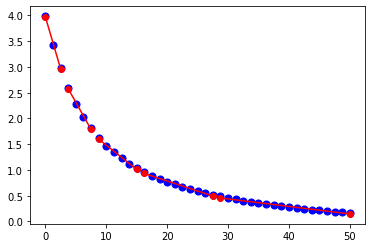

y = 1.999132211419114 - 0.24721970262160564·x¹, if x in [0.0, 1.25]
y = 1.7071848664431577 - 0.08730638509561815·x¹, if x in [2.5, 7.5]
y = 1.3841574565169517 - 0.04697687712979635·x¹, if x in [8.75, 16.25]
y = 0.9771240899705337 - 0.023120357278083915·x¹, if x in [17.5, 30.0]
y = 0.5489987636052875 - 0.00909268206819385·x¹, if x in [31.25, 50.0]


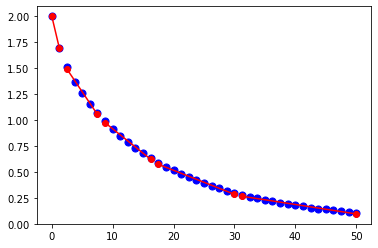

y = 2.9713231509580096 - 0.1701281078111991·x¹, if x in [0.0, 5.0]
y = 2.626925682827105 - 0.11105165193182143·x¹, if x in [6.25, 12.5]
y = 1.9797341803112327 - 0.061402461988534385·x¹, if x in [13.75, 21.25]
y = 1.293042984810123 - 0.029886467050574725·x¹, if x in [22.5, 32.5]
y = 0.6846167210415786 - 0.011547755803506117·x¹, if x in [33.75, 50.0]


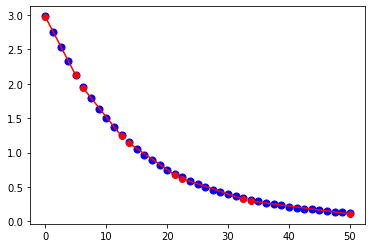

y = 2.9713231509580096 - 0.1701281078111991·x¹, if x in [0.0, 5.0]
y = 2.626925682827105 - 0.11105165193182143·x¹, if x in [6.25, 12.5]
y = 1.9797341803112327 - 0.061402461988534385·x¹, if x in [13.75, 21.25]
y = 1.293042984810123 - 0.029886467050574725·x¹, if x in [22.5, 32.5]
y = 0.6846167210415786 - 0.011547755803506117·x¹, if x in [33.75, 50.0]


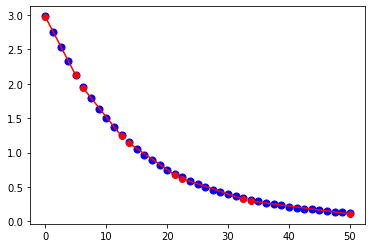

y = 3.002865471251486 - 0.23421977756249795·x¹, if x in [0.0, 1.25]
y = 2.7707894763360867 - 0.11227776966328502·x¹, if x in [2.5, 10.0]
y = 2.275043554620615 - 0.06522962030175071·x¹, if x in [11.25, 20.0]
y = 1.6613280654584026 - 0.03529180173589969·x¹, if x in [21.25, 32.5]
y = 1.0450998754109948 - 0.016711850663717505·x¹, if x in [33.75, 50.0]


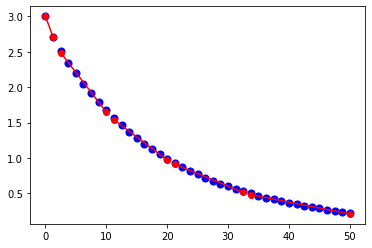

y = 2.983635187695424 - 0.16138954302659964·x¹, if x in [0.0, 5.0]
y = 2.666100257374445 - 0.10581000882919754·x¹, if x in [6.25, 12.5]
y = 2.089478645607388 - 0.061633117292175375·x¹, if x in [13.75, 21.25]
y = 1.4481777634203157 - 0.032255062686248046·x¹, if x in [22.5, 32.5]
y = 0.8312432619526644 - 0.013713792363662566·x¹, if x in [33.75, 50.0]


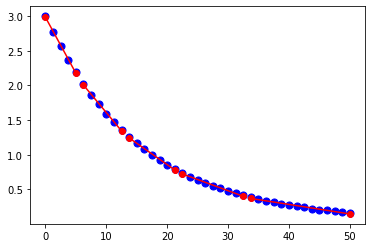

y = 3.9680308778814832 - 0.28638264502239325·x¹, if x in [0.0, 5.0]
y = 3.280507630855827 - 0.16267914025761337·x¹, if x in [6.25, 11.25]
y = 2.3230559251474587 - 0.08119325995912938·x¹, if x in [12.5, 18.75]
y = 1.4330976989449533 - 0.035266231212291735·x¹, if x in [20.0, 30.0]
y = 0.7226370158341973 - 0.012119207936219446·x¹, if x in [31.25, 50.0]


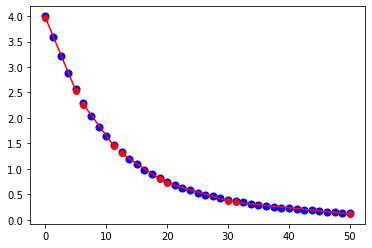

y = 1.9987492366796327 - 0.044685960068256605·x¹, if x in [0.0, 1.25]
y = 2.0490667461789718 - 0.07719798947639513·x¹, if x in [2.5, 11.25]
y = 1.7026484199155452 - 0.0485362534383268·x¹, if x in [12.5, 21.25]
y = 1.201265682535524 - 0.025534787143549353·x¹, if x in [22.5, 33.75]
y = 0.7280304980159352 - 0.011699569278908764·x¹, if x in [35.0, 50.0]


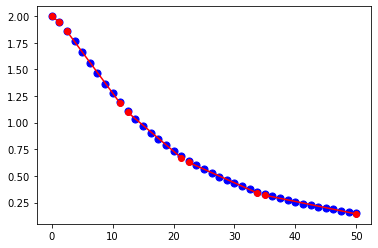

y = 2.0175434628083595 + 0.05786429711617229·x¹, if x in [0.0, 2.5]
y = 2.401007245859044 - 0.07796813550603898·x¹, if x in [3.75, 13.75]
y = 2.001938515960773 - 0.05059556250435819·x¹, if x in [15.0, 23.75]
y = 1.494428141833902 - 0.02961121862239185·x¹, if x in [25.0, 35.0]
y = 0.9940818017781526 - 0.015587680925627206·x¹, if x in [36.25, 50.0]


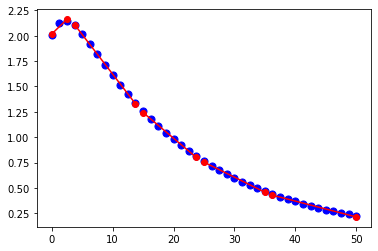

y = 2.0175434628083595 + 0.05786429711617229·x¹, if x in [0.0, 2.5]
y = 2.401007245859044 - 0.07796813550603898·x¹, if x in [3.75, 13.75]
y = 2.001938515960773 - 0.05059556250435819·x¹, if x in [15.0, 23.75]
y = 1.494428141833902 - 0.02961121862239185·x¹, if x in [25.0, 35.0]
y = 0.9940818017781526 - 0.015587680925627206·x¹, if x in [36.25, 50.0]


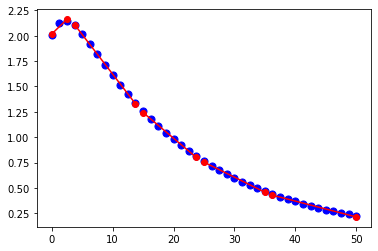

y = 3.9811290256678262 - 0.37052743143395284·x¹, if x in [0.0, 2.5]
y = 3.4035360746960888 - 0.17999255761395375·x¹, if x in [3.75, 7.5]
y = 2.6651649749108537 - 0.08999710214424764·x¹, if x in [8.75, 16.25]
y = 1.8744107988853305 - 0.04327042766800762·x¹, if x in [17.5, 30.0]
y = 1.1022524300882468 - 0.017991791912918744·x¹, if x in [31.25, 50.0]


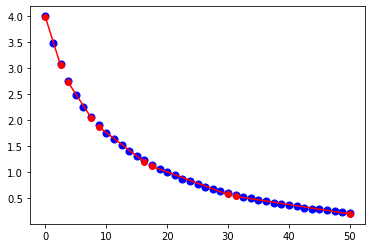

In [6]:
for inn in [i+1 for i in range(tot_inn)]:
    def f(breakpoints, x, y, fcache):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        if breakpoints not in fcache:
            total_error = 0
            for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
                total_error += ((f(xi) - yi)**2).sum()
            fcache[breakpoints] = total_error
        # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
        return fcache[breakpoints]

    def find_best_piecewise_polynomial(breakpoints, x, y):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        xs = np.split(x, breakpoints)
        ys = np.split(y, breakpoints)
        result = []
        for xi, yi in zip(xs, ys):
            if len(xi) < 2: continue
            coefs = npoly.polyfit(xi, yi, 1)
            f = npoly.Polynomial(coefs)
            result.append([f, xi, yi])
        return result

    x = np.array(df.t)
    y = np.array(df["inn"+str(inn)])

    num_breakpoints = 4
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
    count=1
    plt.scatter(x, y, c='blue', s=50)
    for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
        x_interval = np.array([xi.min(), xi.max()])
        inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
        inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
        inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
        inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
        print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
        count=count+1
        plt.plot(x_interval, f(x_interval), 'ro-')

    inn_reg.loc[inn,"Inn"]=inn
    inn_xrang.loc[inn,"R0"]=0.0
    inn_yrang.loc[inn,"Y0"]=0.0
    #inn_xrang.loc[inn,"Inn"]=inn
    plt.show()
 

https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [7]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,3.969,-0.403,3.365,-0.211,2.418,-0.094,1.562,-0.039,0.875,-0.015
2,2,1.999,-0.247,1.707,-0.087,1.384,-0.047,0.977,-0.023,0.549,-0.009
3,3,2.971,-0.17,2.627,-0.111,1.98,-0.061,1.293,-0.03,0.685,-0.012
4,4,2.971,-0.17,2.627,-0.111,1.98,-0.061,1.293,-0.03,0.685,-0.012
5,5,3.003,-0.234,2.771,-0.112,2.275,-0.065,1.661,-0.035,1.045,-0.017
6,6,2.984,-0.161,2.666,-0.106,2.089,-0.062,1.448,-0.032,0.831,-0.014
7,7,3.968,-0.286,3.281,-0.163,2.323,-0.081,1.433,-0.035,0.723,-0.012
8,8,1.999,-0.045,2.049,-0.077,1.703,-0.049,1.201,-0.026,0.728,-0.012
9,9,2.018,0.058,2.401,-0.078,2.002,-0.051,1.494,-0.03,0.994,-0.016
10,10,2.018,0.058,2.401,-0.078,2.002,-0.051,1.494,-0.03,0.994,-0.016


In [8]:
inn_xrang

,R0,R1,R2,R3,R4,R5
1,0.0,2.5,7.5,15.0,27.5,50.0
2,0.0,1.25,7.5,16.25,30.0,50.0
3,0.0,5.0,12.5,21.25,32.5,50.0
4,0.0,5.0,12.5,21.25,32.5,50.0
5,0.0,1.25,10.0,20.0,32.5,50.0
6,0.0,5.0,12.5,21.25,32.5,50.0
7,0.0,5.0,11.25,18.75,30.0,50.0
8,0.0,1.25,11.25,21.25,33.75,50.0
9,0.0,2.5,13.75,23.75,35.0,50.0
10,0.0,2.5,13.75,23.75,35.0,50.0


In [9]:
inn_yrang

,Y0,Y1,Y2,Y3,Y4,Y5
1,0.0,2.962327,1.786179,1.010551,0.493483,0.145717
2,0.0,1.690108,1.052387,0.620783,0.283513,0.094365
3,0.0,2.120683,1.23878,0.674932,0.321733,0.107229
4,0.0,2.120683,1.23878,0.674932,0.321733,0.107229
5,0.0,2.710091,1.648012,0.970451,0.514345,0.209507
6,0.0,2.176687,1.343475,0.779775,0.399888,0.145554
7,0.0,2.536118,1.450367,0.800682,0.375111,0.116677
8,0.0,1.942892,1.180589,0.671253,0.339467,0.143052
9,0.0,2.162204,1.328945,0.800294,0.458035,0.214698
10,0.0,2.162204,1.328945,0.800294,0.458035,0.214698


In [10]:
inn_reg.to_csv("./data-case-roadmap/inn_reg.csv")
inn_xrang.to_csv("./data-case-roadmap/inn_xrang.csv")
inn_yrang.to_csv("./data-case-roadmap/inn_yrang.csv")